## 타이타닉 분류 실습

- Business Understanding 생존자 예측 (Task Classification)

- Data Understanding: 수집, 통계, 시각화

In [175]:
import pandas as pd
train_data = pd.read_csv('../python/11_pandas/data/train.csv')
train_data.shape

(891, 12)

In [176]:
train_data.info() # Null 값 확인(Age, Cabin 컬럼)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [177]:
train_data.describe() # 이상치 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [178]:
train_data.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8520\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [179]:
# 성별 컬럼과 Survived 컬럼의 상관관계
# 남 == 0, 여 == 1

train_data['Sex_num'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [180]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [181]:
train_data.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8520\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333
Sex_num,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000


C:\Users\Playdata\AppData\Local\Temp\ipykernel_8520\2788496423.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), cmap='Greens', annot=True)


<Axes: >

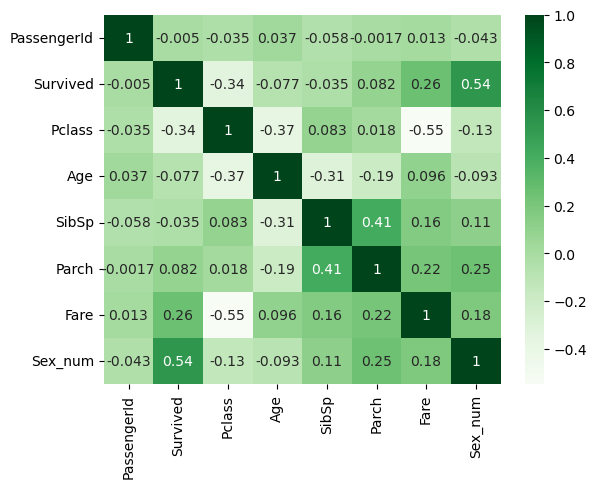

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train_data.corr(), cmap='Greens', annot=True)

- Data Preparation

In [183]:
# Age 결측치 처리
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [184]:
# train_data의 성별의 결측치에 성별의 평균값 대입
train_data_age_mean = train_data['Age'].mean()
train_data['Age'].fillna(train_data_age_mean, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


- Modeling (머신러닝 모델 사용 없이)

In [185]:
# model1 : 여성이면 생존
# model2 : 여성 이거나(or) 나이가 16세 미만이면서 pclass가 2이면 생존
# model3 : 여성 이면서 pclass가 1 또는 2 이거나(or) 16세 미만이면서 pclass가 2이거나 남성이면서 pclass가 1이면 생존

In [186]:
def model1(df):
    # Dataframe 입력 받음
    df['Pred'] = 0
    df.loc[df['Sex'] == 'female', ['Pred']] = 1
    # 출력 Series (생존여부, 생존 1/생존x 0)
    return df['Pred']

In [187]:
# 강사님 코드
def model1(df):
    result = (df['Sex'] == 'female').astype('int')
    return result

In [188]:
def model2(df):
    # Dataframe 입력 받음
    df['Pred'] = 0
    df.loc[(df['Sex'] == 'female') | ((df['Age'] < 16) & (df['Pclass'] == 2)), ['Pred']] = 1
    # 출력 Series (생존여부, 생존 1/생존x 0)
    return df['Pred']

In [189]:
# model3 : 여성 이면서 pclass가 1 또는 2 이거나(or) 16세 미만이면서 pclass가 2이거나 남성이면서 pclass가 1이면 생존
def model3(df):
    # Dataframe 입력 받음
    df['Pred'] = 0
    df.loc[((df['Sex'] == 'female') & (df['Pclass'] != 3)) | ((df['Age'] < 16) & (df['Pclass'] == 2)) | ((df['Sex'] == 'male') & (df['Pclass'] == 1)), ['Pred']] = 1
    # 출력 Series (생존여부, 생존 1/생존x 0)
    return df['Pred']

- Evaluate

In [190]:
# 정확도
def evaluate(label, pred):
    return(label == pred).mean()

In [192]:
evaluate(train_data['Survived'], model1(train_data))

0.7867564534231201

In [193]:
evaluate(train_data['Survived'], model2(train_data))

0.7968574635241302

In [191]:
evaluate(train_data['Survived'], model3(train_data))

0.7609427609427609

- Test set에 대한 평가(Train set에 대한 평가보다 신뢰성이 높은 평가)

In [203]:
test_data = pd.read_csv('../python/11_pandas/data/test.csv')

In [204]:
test_data.info() # Age의 Null 값을 train set의 평균으로 채워야 할까? test set의 평균으로 채워야 할까?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [210]:
# train의 평균으로 채워야 한다. => train의 데이터의 양이 더 많으므로 평균치가 더 적합하다
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].mean())

In [211]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Pred         418 non-null    int64  
 12  Survived     418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [200]:
test_data['Survived'] = model1(test_data)
model1_df = test_data[['PassengerId', 'Survived']]
model1_df.to_csv('data/model1_df.csv', index=False)
# 0.76555

In [206]:
test_data['Survived'] = model2(test_data)
model2_df = test_data[['PassengerId', 'Survived']]
model2_df.to_csv('data/model2_df.csv', index=False)
# 0.76794

In [202]:
test_data['Survived'] = model3(test_data)
model3_df = test_data[['PassengerId', 'Survived']]
model3_df.to_csv('data/model3_df.csv', index=False)
# 0.7177